In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
len(digits.feature_names)

64

<Figure size 432x288 with 0 Axes>

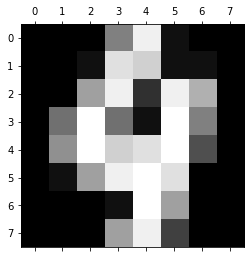

In [4]:
plt.gray()
plt.matshow(digits.images[14])
plt.show()

In [5]:
X = digits["data"]
y = digits["target"]

In [6]:
X.shape

(1797, 64)

In [7]:
y.shape

(1797,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.9694444444444444

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.97703549, 0.96868476, 0.97077244])

In [14]:
from sklearn.model_selection import GridSearchCV 

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': [2, 4, 6, 8],
    'bootstrap': [True, False]
}  

forest_clf = RandomForestClassifier() 
grid_search = GridSearchCV(forest_clf, param_grid, cv=5, 
                            scoring='neg_mean_squared_error', return_train_score=True) 

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [15]:
np.sqrt(-grid_search.best_score_)

0.6276261127133409

In [16]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 100}

In [17]:
from sklearn.neighbors import KNeighborsClassifier 
knn_clf = KNeighborsClassifier() 
knn_clf.fit(X_train, y_train) 
knn_clf.score(X_train, y_train)

0.9902574808629089

In [18]:
knn_clf.score(X_test, y_test)

0.975

In [19]:
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.97912317, 0.98121086, 0.97912317])